<ipython-input-21-98ef0790637c>:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', num_labels)


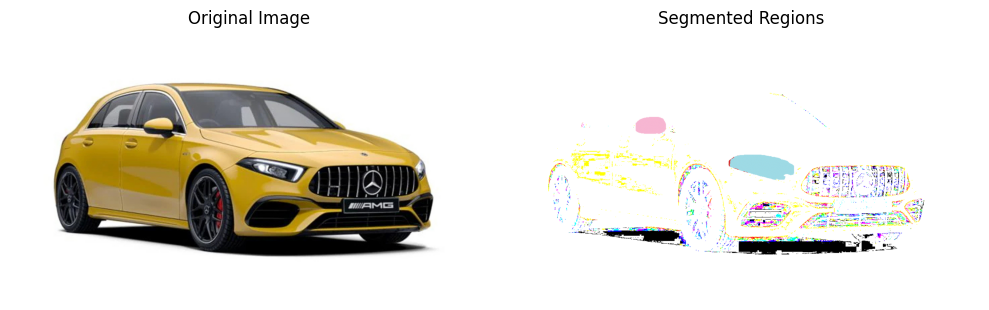

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.models.detection import maskrcnn_resnet50_fpn
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load and transform the input image
image_path = '/content/exterior-right-front-three-quarter-2.jpeg'
image = Image.open(image_path).convert('RGB')
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])
input_image = transform(image).unsqueeze(0)

# Load the pre-trained Mask R-CNN model
model = maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Make predictions on the input image
with torch.no_grad():
    predictions = model(input_image)

# Get the predicted masks and labels
masks = predictions[0]['masks'].detach().numpy()
labels = predictions[0]['labels'].detach().numpy()

# Adjust the threshold to make regions more prominent
threshold = 0.1

# Generate different colors for each region label
num_labels = labels.max() + 1
colors = plt.cm.get_cmap('tab20', num_labels)

# Create the segmented image with different colors for each region
segmented_image = image.copy()
for i in range(1, num_labels):
    mask = masks[i, 0]
    mask = np.where(mask >= threshold, 1, 0)
    color = colors(i / num_labels)[:3]
    segmented_image = np.where(np.repeat(mask[:, :, np.newaxis], 3, axis=2), color, segmented_image)

# Display the original image and the segmented regions
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(segmented_image)
axes[1].set_title('Segmented Regions')
axes[1].axis('off')
plt.tight_layout()
plt.show()


In [ ]:
!unzip /content/drive/MyDrive/data/paintings.zip -d /content

Archive:  /content/drive/MyDrive/data/paintings.zip
  inflating: /content/labels.csv     
  inflating: /content/train/images/painting10.png  
  inflating: /content/train/images/painting101.png  
  inflating: /content/train/images/painting103.png  
  inflating: /content/train/images/painting105.png  
  inflating: /content/train/images/painting109.png  
  inflating: /content/train/images/painting110.png  
  inflating: /content/train/images/painting111.png  
  inflating: /content/train/images/painting112.png  
  inflating: /content/train/images/painting115.png  
  inflating: /content/train/images/painting116.png  
  inflating: /content/train/images/painting117.png  
  inflating: /content/train/images/painting118.png  
  inflating: /content/train/images/painting12.png  
  inflating: /content/train/images/painting120.png  
  inflating: /content/train/images/painting121.png  
  inflating: /content/train/images/painting123.png  
  inflating: /content/train/images/painting124.png  
  inflating

In [ ]:
import os
import cv2
import numpy as np

# Set the input folders and output folder paths
folder1_path = '/content/train/images'
folder2_path = '/content/train/labels'
output_folder = '/content/merged'

# Set the desired output image size
output_size = (512, 256)

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Get the list of images in folder 1
folder1_images = os.listdir(folder1_path)

# Iterate over the images in folder 1
for image_name in folder1_images:
    # Load the image from folder 1
    image1 = cv2.imread(os.path.join(folder1_path, image_name))

    # Resize the image to the desired output size
    image1 = cv2.resize(image1, (output_size[0] // 2, output_size[1]))

    # Load the corresponding image from folder 2
    image2 = cv2.imread(os.path.join(folder2_path, image_name))

    # Resize the image to the desired output size
    image2 = cv2.resize(image2, (output_size[0] // 2, output_size[1]))

    # Concatenate the two images horizontally
    output_image = np.concatenate((image1, image2), axis=1)

    # Save the resulting image to the output folder
    output_path = os.path.join(output_folder, image_name)
    cv2.imwrite(output_path, output_image)

    print(f"Processed image: {image_name}")

print("Image processing complete.")


Processed image: painting20.png
Processed image: painting304.png
Processed image: painting129.png
Processed image: painting77.png
Processed image: painting276.png
Processed image: painting105.png
Processed image: painting99.png
Processed image: painting167.png
Processed image: painting96.png
Processed image: painting251.png
Processed image: painting300.png
Processed image: painting177.png
Processed image: painting143.png
Processed image: painting205.png
Processed image: painting69.png
Processed image: painting268.png
Processed image: painting152.png
Processed image: painting14.png
Processed image: painting115.png
Processed image: painting110.png
Processed image: painting350.png
Processed image: painting90.png
Processed image: painting230.png
Processed image: painting337.png
Processed image: painting190.png
Processed image: painting33.png
Processed image: painting342.png
Processed image: painting76.png
Processed image: painting130.png
Processed image: painting407.png
Processed image: pa

In [ ]:
import shutil
import os
import zipfile

def zip_folder(folder_path, output_path):
    # Zip the folder and its contents
    shutil.make_archive(output_path, 'zip', folder_path)

# Set the folder path to zip
folder_to_zip = '/content/merged'

# Set the output zip file path
output_zip_file = '/content/merged'

# Zip the folder
zip_folder(folder_to_zip, output_zip_file)

# Provide the zip file for download
download_link = f'<a href="{output_zip_file}" download>Download Zip</a>'
print(download_link)


<a href="/content/merged" download>Download Zip</a>


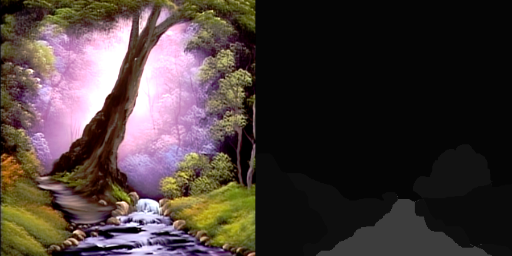

Image: painting20.png, Dimensions: 512x256


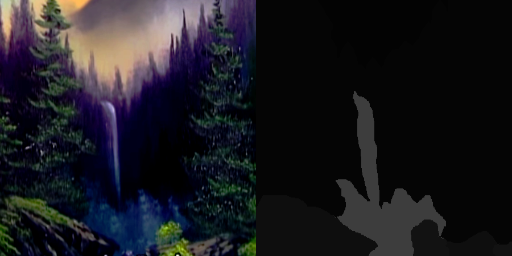

Image: painting304.png, Dimensions: 512x256


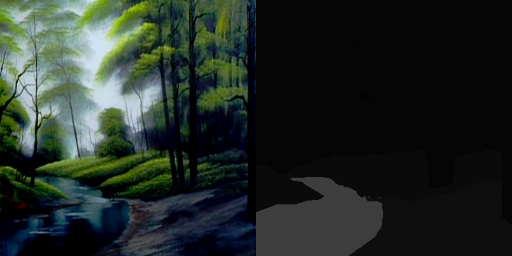

Image: painting129.png, Dimensions: 512x256


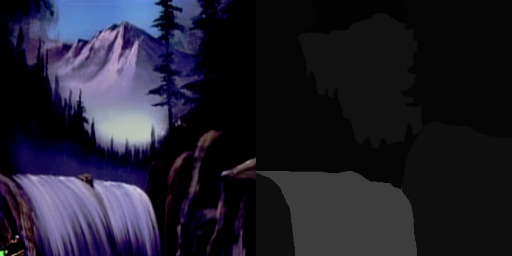

Image: painting77.png, Dimensions: 512x256


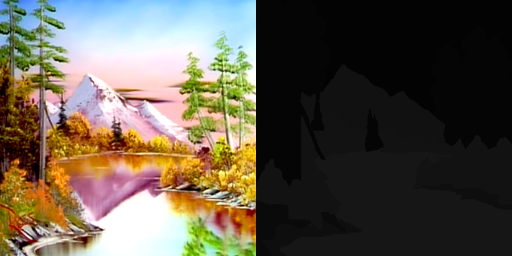

Image: painting276.png, Dimensions: 512x256


In [ ]:
import os
from PIL import Image

folder_path = '/content/merged'

# Get the list of image files in the folder
image_files = [file for file in os.listdir(folder_path) if file.endswith(('.jpg', '.jpeg', '.png'))]

# Iterate over the first 5 image files
for image_file in image_files[:5]:
    image_path = os.path.join(folder_path, image_file)

    # Open the image and get its dimensions
    with Image.open(image_path) as image:
        width, height = image.size

        # Display the image and print the filename and dimensions
        image.show()
        print(f"Image: {image_file}, Dimensions: {width}x{height}")

